# Summary of decoding scores

In [1]:
import pickle
import os
import matplotlib.pyplot as plt

os.chdir("/work")
from param import *

output_dir = ParamDir().OUTPUT_DIR
datalist = ParamDir().data_path_list


Text(0, 0.5, 'MSE(cm2)')

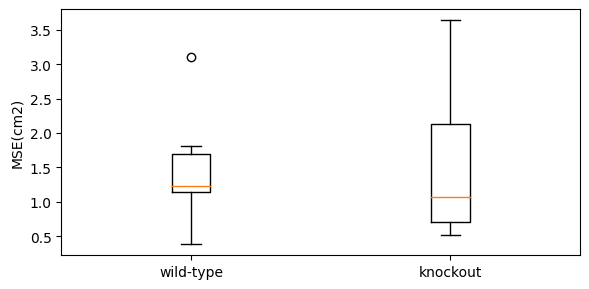

In [22]:

ko_mse_list = []
wt_mse_list = []
for data_dir in datalist:
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "knockout" if "CaMKII" in data_name else "wild-type"
    if mouse_type == "knockout":
        with open(output_dir/(f"rr_spikes_past_coord_eval_{data_name}.pickle"),"rb") as f:
            eval_results_all = pickle.load(f)
        test_mse = [result["eval_test_scores"] for result in eval_results_all if (result["coord_axis"] == "x-axis") and (result["nthist"] == 1)][0]
        ko_mse_list .append(test_mse/25)
    if mouse_type == "wild-type":
        with open(output_dir/(f"rr_spikes_past_coord_eval_{data_name}.pickle"),"rb") as f:
            eval_results_all = pickle.load(f)
        test_mse = [result["eval_test_scores"] for result in eval_results_all if (result["coord_axis"] == "x-axis") and (result["nthist"] == 1)][0]
        wt_mse_list .append(test_mse/25)

fig, ax = plt.subplots(figsize=(6,3), tight_layout = True)
ax.boxplot([wt_mse_list, ko_mse_list])
ax.set_xticklabels(['wild-type', 'knockout'])
ax.set_ylabel("MSE(cm2)")